<b>Mini Project</b><br>
<b>Student Name & Student ID:</b> <br>
    1. RAUDHATUL SAADAH BINTI ABDUL RAZAK - 52213122400 <br>
    2. PUTRI NURSYAZANA BINTI MUSTAFA KAMAL - 52213122010 <br>
    3. WAN NURUL EZZAH BINTI SAHARDI - 52213123227 <br>
<br>
<b>Domain</b> <br>
Animal Subspecies - <i>Rabbit</i>

---

library

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import urllib.parse
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
import shutil
from sklearn.model_selection import train_test_split

<b>1. Data Preparation</b>

In [ ]:
def fetch_image(img_url, output_path, index, query):
    try:
        img_data = requests.get(img_url).content
        with open(os.path.join(output_path, f"{query.replace(' ', '_')}_{index}.jpg"), 'wb') as handler:
            handler.write(img_data)
        print(f"Downloaded {query.replace(' ', '_')}_{index}.jpg")
    except Exception as e:
        print(f"Could not download image {index}: {e}")

def download_images(query, num_images, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    headers = {"User-Agent": "Mozilla/5.0"}
    query_encoded = urllib.parse.quote(query)
    downloaded = 0
    page = 0

    keywords = ['chart', 'graph', 'map', 'maps', 'dog', 'location', 'locations', 'genotypes', 'statistics', 'cartoon']
    capital_keywords = [keyword.capitalize() for keyword in keywords]
    all_keywords = keywords + capital_keywords

    with ThreadPoolExecutor(max_workers=10) as executor:
        future_to_img = {}

        while downloaded < num_images:
            search_url = f"https://www.google.com/search?q={query_encoded}&tbm=isch&start={page*20}"
            response = requests.get(search_url, headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')
            img_tags = soup.find_all('img')[1:]

            if not img_tags:
                break

            for i, img in enumerate(img_tags):
                if downloaded >= num_images:
                    break
                try:
                    img_url = img.get('src') or img.get('data-src')
                    alt_text = img.get('alt', '').lower()

                    if not img_url or not img_url.startswith('http'):
                        continue

                    # Additional filtering to avoid downloading irrelevant images
                    if any(keyword in alt_text for keyword in all_keywords):
                        continue
                    if any(keyword in img_url for keyword in all_keywords):
                        continue

                    future = executor.submit(fetch_image, img_url, output_dir, downloaded, query)
                    future_to_img[future] = downloaded
                    downloaded += 1
                except Exception as e:
                    print(f"Could not process image {downloaded}: {e}")

            page += 1
            time.sleep(1)

        for future in as_completed(future_to_img):
            future.result()

# Start the crawling process with error handling
def main():
    queries = [
        ("picture of fully grown californian rabbit", 1000, "data/californian_rabbit"),
        ("picture of fully grown German Lop rabbit", 1000, "data/German_Lop"),
        ("picture of fully grown Blanc de Bouscat rabbit", 1000, "data/Blanc_de_Bouscat"),
        ("picture of fully grown Belgian Hare rabbit", 1000, "data/Belgian_Hare"),
        ("picture of fully grown Dwarf Hotot rabbit", 1000, "data/Dwarf_Hotot"),
        ("picture of fully grown Harlequin rabbit", 1000, "data/Harlequin"),
        ("picture of fully grown continental giant rabbit", 1000, "data/continental_giant_rabbit"),
        ("picture of fully grown Lionhead rabbit", 1000, "data/Lionhead"),
        ("picture of fully grown thrianta rabbit", 1000, "data/thrianta"),
        ("picture of fully grown Miniature Lop rabbit", 1000, "data/Miniature_Lop")
    ]

    for query, num_images, output_dir in queries:
        print(f"Starting download for {query}...")
        download_images(query, num_images, output_dir)
        time.sleep(1)

if __name__ == "__main__":
    main()


Streaming output truncated to the last 5000 lines.
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_756.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_759.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_757.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_763.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_761.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_762.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_760.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_758.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_764.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_765.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_767.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_768.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_766.jpg
Downloaded picture_of_fully_grown_Belgian_Hare_rabbit_771.jpgDownloaded picture_of_fully_grown_Belgian_Hare_rabbit_773.jpg
Downloaded picture_o

1.1 Graph Bar For Data

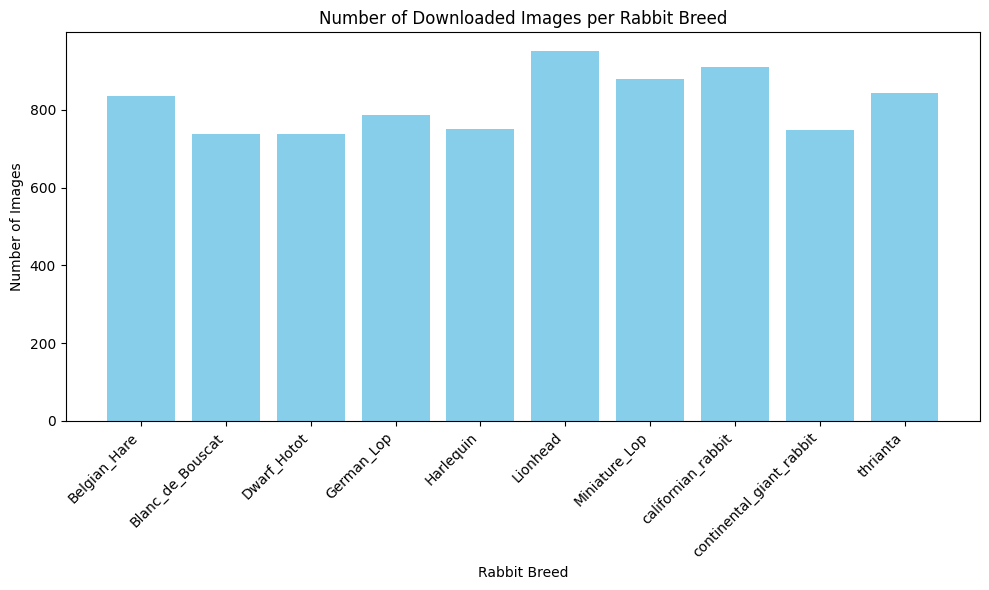

In [ ]:
import os
import matplotlib.pyplot as plt

directories = [
    "data/californian_rabbit",
    "data/German_Lop",
    "data/Blanc_de_Bouscat",
    "data/Belgian_Hare",
    "data/Dwarf_Hotot",
    "data/Harlequin",
    "data/continental_giant_rabbit",
    "data/Lionhead",
    "data/thrianta",
    "data/Miniature_Lop"
]

breed_counts = {}

for directory in directories:
    breed_name = os.path.basename(directory)  # Extract the breed name from the directory path
    if os.path.exists(directory):
        num_files = len(os.listdir(directory))
        breed_counts[breed_name] = num_files

sorted_counts = dict(sorted(breed_counts.items()))

plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Rabbit Breed')
plt.ylabel('Number of Images')
plt.title('Number of Downloaded Images per Rabbit Breed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


1.2 Split dataset -> training, validation, testing</b>

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def create_split_directories(base_dir, categories, splits):
    for split in splits:
        for category in categories:
            split_dir = os.path.join(base_dir, split, category)
            os.makedirs(split_dir, exist_ok=True)

def split_data(base_dir, categories, split_ratios):
    train_ratio, val_ratio, test_ratio = split_ratios
    splits = ['train', 'validation', 'test']
    create_split_directories(base_dir, categories, splits)

    for category in categories:
        category_dir = os.path.join(base_dir, category)
        images = [img for img in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, img))]
        train_and_val, test = train_test_split(images, test_size=test_ratio, random_state=42)
        train, val = train_test_split(train_and_val, test_size=val_ratio/(train_ratio + val_ratio), random_state=42)

        for split, split_images in zip(splits, [train, val, test]):
            split_dir = os.path.join(base_dir, split, category)
            for image in split_images:
                shutil.move(os.path.join(category_dir, image), os.path.join(split_dir, image))

# Define base directory and categories
base_dir = "data"
categories = ["californian_rabbit", "German_Lop", "Blanc_de_Bouscat", "Belgian_Hare",
              "Dwarf_Hotot", "Harlequin", "continental_giant_rabbit", "Lionhead", "thrianta", "Miniature_Lop"]

# Define split ratios: 70% training, 15% validation, 15% testing
split_ratios = (0.7, 0.15, 0.15)

# Perform the split
split_data(base_dir, categories, split_ratios)


In [ ]:
!pip install tensorflow keras matplotlib scikit-learn

when downloading the dataset, put it in a different file which is the American Eskimo dog file, Siberian husky file, etc in the data folder
but when we split the dataset it will generate folder test, train & validation. <br>
it will put the dataset image in that folder. It will split to 70%, 15%, 15% for each of the folder.

---

<b>2. Data Modelling</b>

2.1 train resnet50

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import accuracy_score, average_precision_score

# Setup data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build model using ResNet50
def build_resnet(input_shape=(img_height, img_width, 3), num_classes=train_generator.num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)

    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_resnet()

# Train model without early stopping
checkpoint = ModelCheckpoint('best_resnet_model.keras', monitor='val_loss', save_best_only=True)
csv_logger = CSVLogger('training_log_resnet50.csv', append=True)

history_resnet50 = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint, csv_logger],
    verbose=1
)

# Evaluate model
model.load_weights('best_resnet_model.keras')
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

Found 5724 images belonging to 10 classes.
Found 1232 images belonging to 10 classes.
Found 1232 images belonging to 10 classes.
Epoch 1/50
179/179 [==============================] - 394s 2s/step - loss: 3.3096 - accuracy: 0.1323 - val_loss: 2.8276 - val_accuracy: 0.0852
Epoch 2/50
179/179 [==============================] - 369s 2s/step - loss: 2.8562 - accuracy: 0.1955 - val_loss: 2.8093 - val_accuracy: 0.1047
Epoch 3/50
179/179 [==============================] - 364s 2s/step - loss: 2.4581 - accuracy: 0.2350 - val_loss: 3.6848 - val_accuracy: 0.1144
Epoch 4/50
179/179 [==============================] - 361s 2s/step - loss: 2.2789 - accuracy: 0.2598 - val_loss: 3.1065 - val_accuracy: 0.1485
Epoch 5/50
179/179 [==============================] - 365s 2s/step - loss: 2.1333 - accuracy: 0.2893 - val_loss: 2.1552 - val_accuracy: 0.2662
Epoch 6/50
179/179 [==============================] - 362s 2s/step - loss: 2.0404 - accuracy: 0.3084 - val_loss: 2.0462 - val_accuracy: 0.3360
Epoch 7/50
17

2.2 train DenseNet121

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import accuracy_score, average_precision_score

# Setup data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build model using DenseNet121
def build_densenet(input_shape=(img_height, img_width, 3), num_classes=train_generator.num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)

    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = build_densenet()

# Train model without early stopping
checkpoint = ModelCheckpoint('best_densenet_model.h5', monitor='val_loss', save_best_only=True)
csv_logger = CSVLogger('training_log.csv', append=True)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[checkpoint, csv_logger],
    verbose=1
)

# Evaluate model
model.load_weights('best_densenet_model.h5')
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")


Found 5724 images belonging to 10 classes.
Found 1232 images belonging to 10 classes.
Found 1232 images belonging to 10 classes.
Epoch 1/50
179/179 [==============================] - ETA: 0s - loss: 3.3937 - accuracy: 0.1214

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - 553s 3s/step - loss: 3.3937 - accuracy: 0.1214 - val_loss: 2.4763 - val_accuracy: 0.1502
Epoch 2/50
179/179 [==============================] - 518s 3s/step - loss: 2.9056 - accuracy: 0.1777 - val_loss: 2.3471 - val_accuracy: 0.2240
Epoch 3/50
179/179 [==============================] - 509s 3s/step - loss: 2.6169 - accuracy: 0.1995 - val_loss: 2.2292 - val_accuracy: 0.2630
Epoch 4/50
179/179 [==============================] - 507s 3s/step - loss: 2.3938 - accuracy: 0.2310 - val_loss: 2.0377 - val_accuracy: 0.3117
Epoch 5/50
179/179 [==============================] - 495s 3s/step - loss: 2.2240 - accuracy: 0.2610 - val_loss: 2.1127 - val_accuracy: 0.3101
Epoch 6/50
179/179 [==============================] - 491s 3s/step - loss: 2.0926 - accuracy: 0.2933 - val_loss: 1.9503 - val_accuracy: 0.3482
Epoch 7/50
179/179 [==============================] - 488s 3s/step - loss: 2.0215 - accuracy: 0.3167 - val_loss: 1.9505 - val_accuracy: 0.3377
Epoch 8/50

2.3 Train mobilenetv3

In [12]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

# Define constants
base_dir = 'data'
img_height, img_width = 224, 224
batch_size = 32
epochs = 50

# Create TensorFlow datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_dir, 'train'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_dir, 'validation'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    seed=42
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(base_dir, 'test'),
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical',
    seed=42,
    shuffle=False
)

# Extract class names
class_names = train_ds.class_names
num_classes = len(class_names)


Found 5724 files belonging to 10 classes.
Found 1232 files belonging to 10 classes.
Found 1232 files belonging to 10 classes.


In [13]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_mobilenetv3(version='small', input_shape=(224, 224, 3), num_classes=1000):
    if version == 'small':
        base_model = tf.keras.applications.MobileNetV3Small(input_shape=input_shape, weights='imagenet', include_top=False)
    elif version == 'large':
        base_model = tf.keras.applications.MobileNetV3Large(input_shape=input_shape, weights='imagenet', include_top=False)
    else:
        raise ValueError("Version should be either 'small' or 'large'.")

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)

    optimizer = Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define your input shape and number of classes
img_height, img_width = 224, 224
num_classes = 10  # Change this according to your dataset
epochs = 50  # Adjust the number of epochs as needed

# Build the models
mobilenetv3_small = build_mobilenetv3(version='small', input_shape=(img_height, img_width, 3), num_classes=num_classes)
mobilenetv3_large = build_mobilenetv3(version='large', input_shape=(img_height, img_width, 3), num_classes=num_classes)

# Callbacks
checkpoint_small = ModelCheckpoint('best_mobilenetv3_small_model.keras', monitor='val_loss', save_best_only=True)
checkpoint_large = ModelCheckpoint('best_mobilenetv3_large_model.keras', monitor='val_loss', save_best_only=True)
csv_logger_small = CSVLogger('training_log_mobilenetv3_small.csv', append=True)
csv_logger_large = CSVLogger('training_log_mobilenetv3_large.csv', append=True)

# Assuming train_ds, val_ds, and test_ds are predefined datasets
# Train the models
history_mobilenetv3_small = mobilenetv3_small.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[checkpoint_small, csv_logger_small],
    verbose=1
)

history_mobilenetv3_large = mobilenetv3_large.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[checkpoint_large, csv_logger_large],
    verbose=1
)

# Load best weights and evaluate
mobilenetv3_small.load_weights('best_mobilenetv3_small_model.keras')
eval_results_small = mobilenetv3_small.evaluate(test_ds, verbose=1)
print(f"MobileNetV3 Small - Test Loss: {eval_results_small[0]}")
print(f"MobileNetV3 Small - Test Accuracy: {eval_results_small[1]}")

mobilenetv3_large.load_weights('best_mobilenetv3_large_model.keras')
eval_results_large = mobilenetv3_large.evaluate(test_ds, verbose=1)
print(f"MobileNetV3 Large - Test Loss: {eval_results_large[0]}")
print(f"MobileNetV3 Large - Test Accuracy: {eval_results_large[1]}")


Epoch 1/50
179/179 [==============================] - 61s 273ms/step - loss: 3.3975 - accuracy: 0.1314 - val_loss: 2.2531 - val_accuracy: 0.2289
Epoch 2/50
179/179 [==============================] - 48s 268ms/step - loss: 2.8108 - accuracy: 0.1976 - val_loss: 2.1301 - val_accuracy: 0.2922
Epoch 3/50
179/179 [==============================] - 48s 270ms/step - loss: 2.4661 - accuracy: 0.2395 - val_loss: 2.0388 - val_accuracy: 0.3247
Epoch 4/50
179/179 [==============================] - 49s 275ms/step - loss: 2.2579 - accuracy: 0.2687 - val_loss: 1.9972 - val_accuracy: 0.3466
Epoch 5/50
179/179 [==============================] - 49s 271ms/step - loss: 2.1356 - accuracy: 0.2898 - val_loss: 1.9757 - val_accuracy: 0.3490
Epoch 6/50
179/179 [==============================] - 49s 273ms/step - loss: 2.0161 - accuracy: 0.3195 - val_loss: 1.9704 - val_accuracy: 0.3425
Epoch 7/50
179/179 [==============================] - 49s 272ms/step - loss: 1.9303 - accuracy: 0.3480 - val_loss: 1.9661 - val_ac

3. Accuracy Visualization of Training History

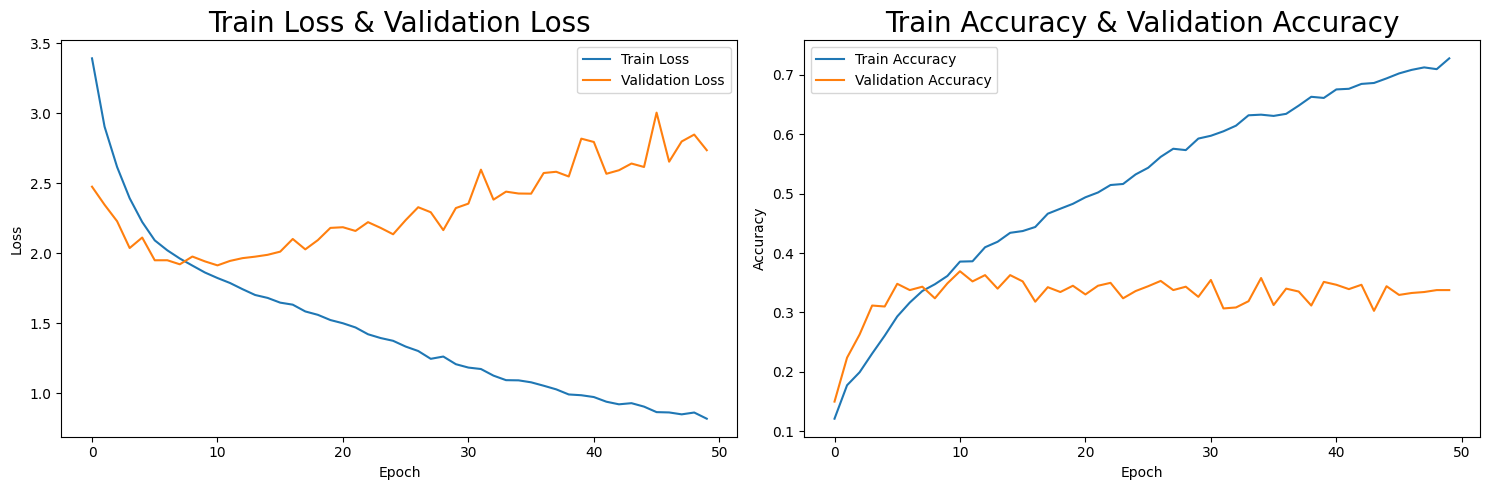

In [15]:
import matplotlib.pyplot as plt

# Plotting the training and validation metrics
plt.figure(figsize=(15, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train Loss & Validation Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train Accuracy & Validation Accuracy', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

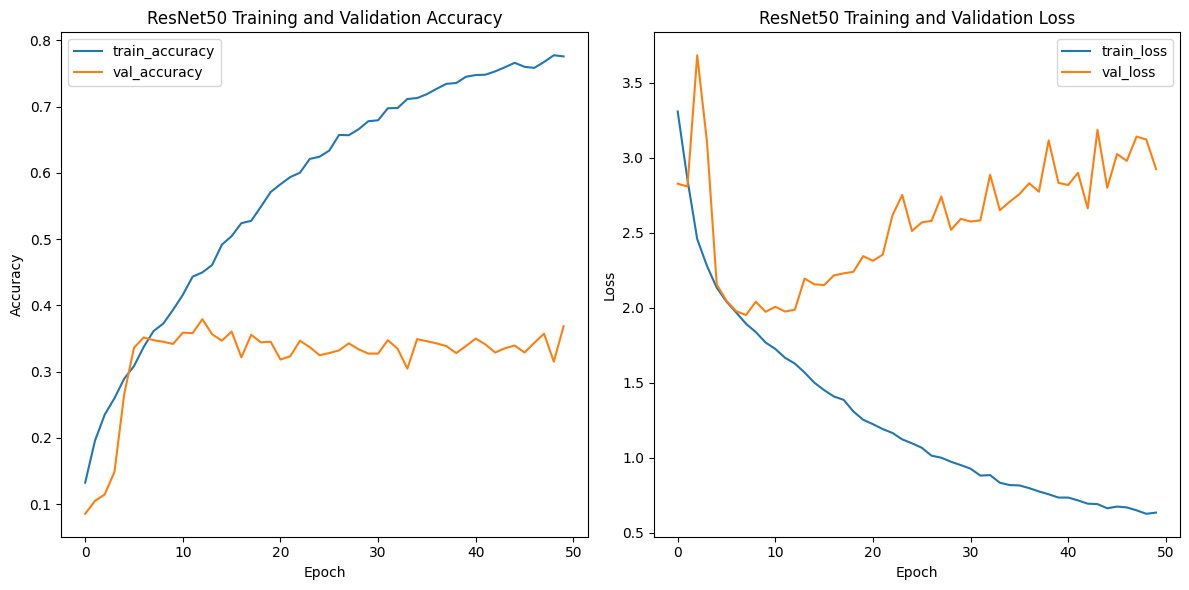

In [16]:
import matplotlib.pyplot as plt

# Plot training history for ResNet50
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'], label='train_accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='val_accuracy')
plt.title('ResNet50 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'], label='train_loss')
plt.plot(history_resnet50.history['val_loss'], label='val_loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


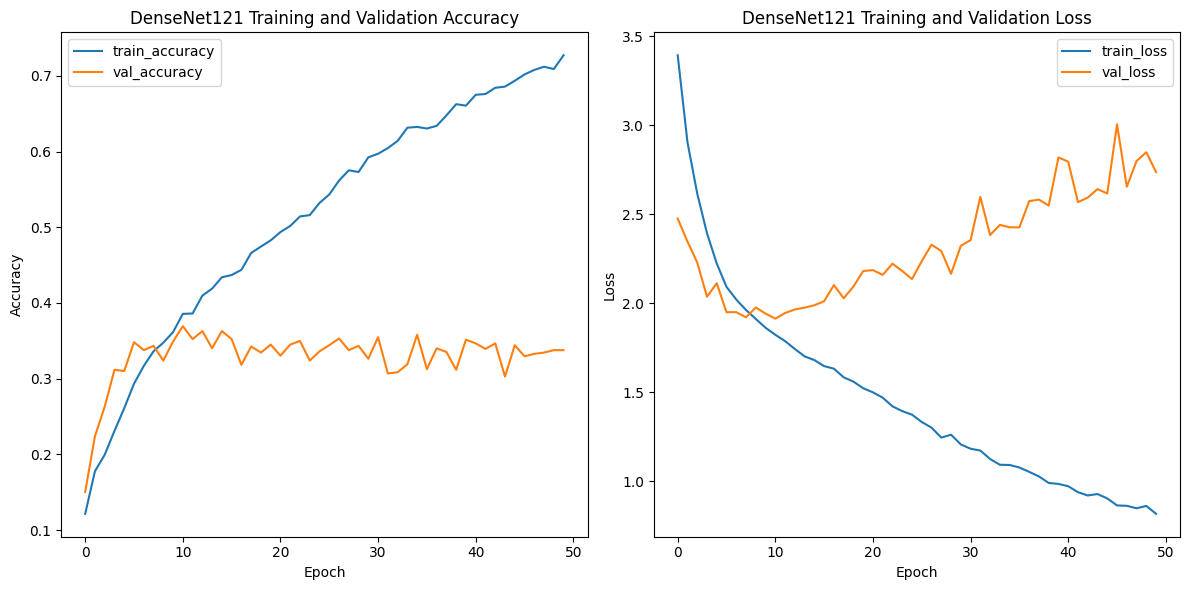

In [18]:
# Plot training history for DenseNet121
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('DenseNet121 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('DenseNet121 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


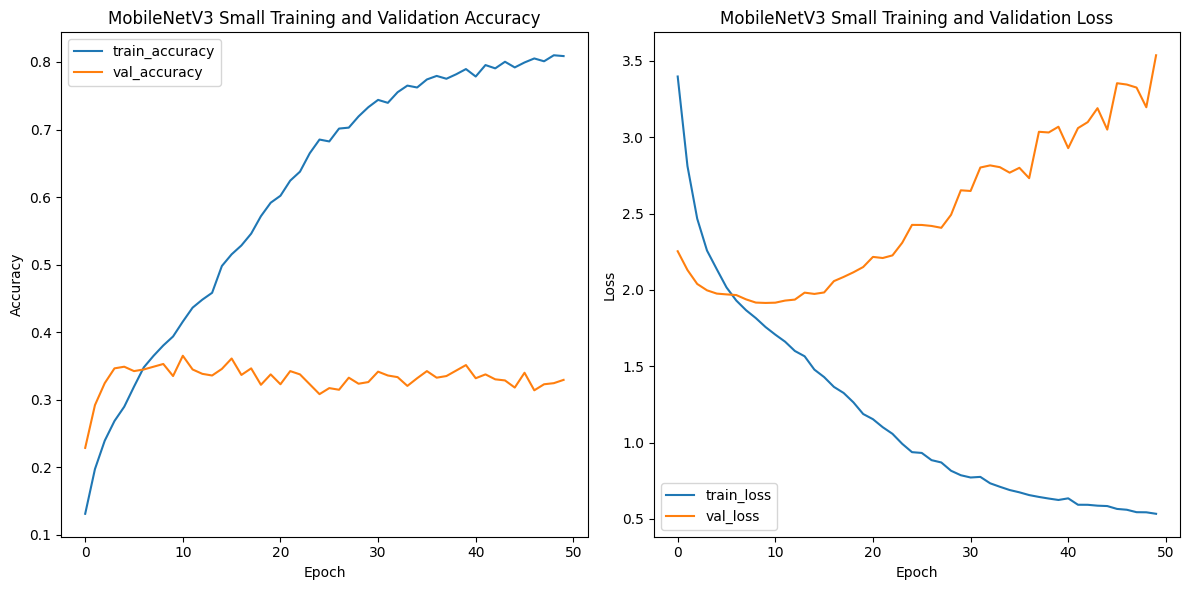

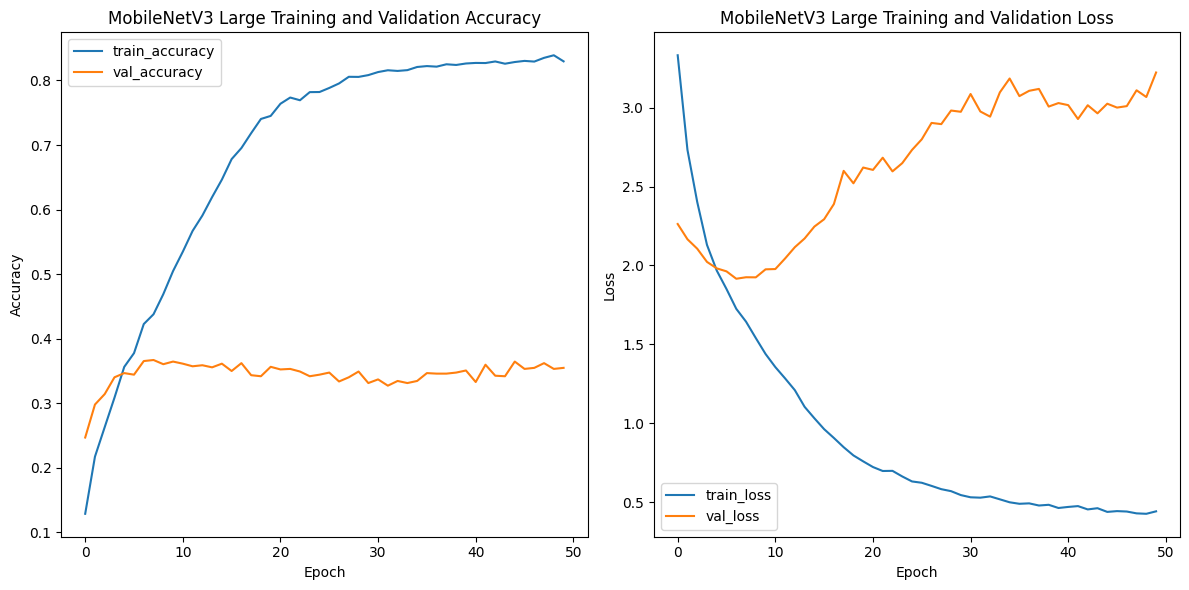

In [23]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy/loss
def plot_accuracy_loss(history, model_name):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot accuracy and loss for MobileNetV3 Small
plot_accuracy_loss(history_mobilenetv3_small, 'MobileNetV3 Small')

# Plot accuracy and loss for MobileNetV3 Large
plot_accuracy_loss(history_mobilenetv3_large, 'MobileNetV3 Large')


Found 1232 images belonging to 10 classes.
39/39 [==============================] - 20s 489ms/step
Accuracy: 0.33035714285714285
mAP: 0.31397464356937566


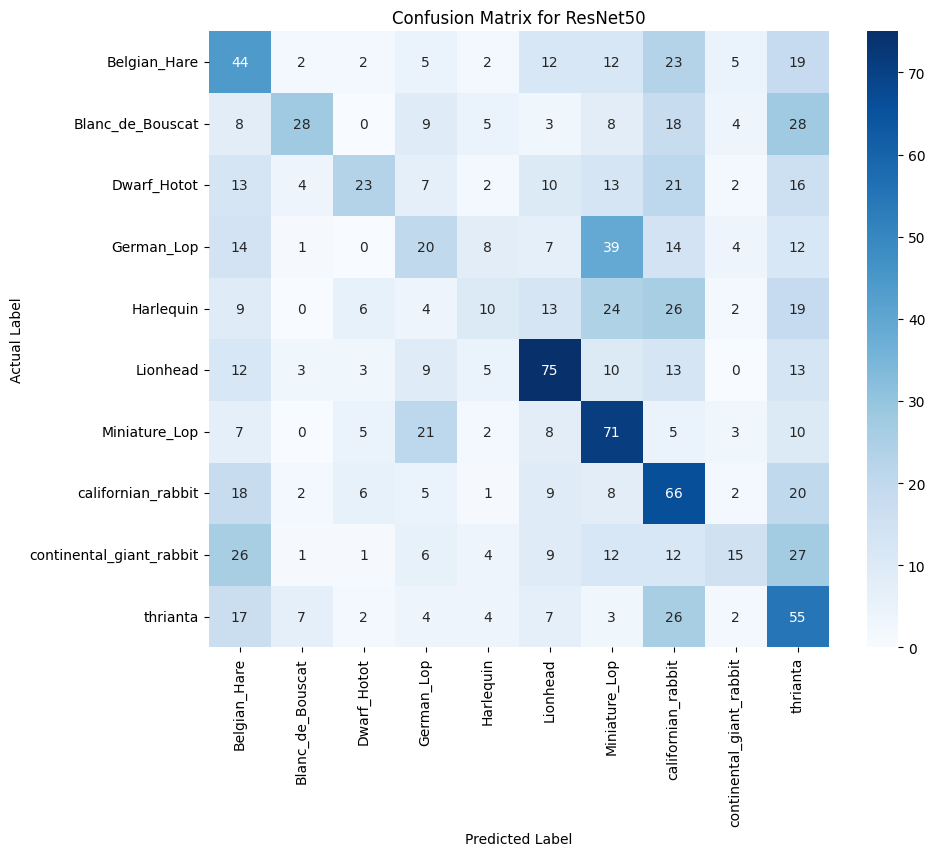

Classification Report for ResNet50
                          precision    recall  f1-score   support

            Belgian_Hare       0.26      0.35      0.30       126
        Blanc_de_Bouscat       0.58      0.25      0.35       111
             Dwarf_Hotot       0.48      0.21      0.29       111
              German_Lop       0.22      0.17      0.19       119
               Harlequin       0.23      0.09      0.13       113
                Lionhead       0.49      0.52      0.51       143
           Miniature_Lop       0.35      0.54      0.43       132
      californian_rabbit       0.29      0.48      0.37       137
continental_giant_rabbit       0.38      0.13      0.20       113
                thrianta       0.25      0.43      0.32       127

                accuracy                           0.33      1232
               macro avg       0.36      0.32      0.31      1232
            weighted avg       0.35      0.33      0.31      1232



In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
resnet50 = tf.keras.models.load_model('best_resnet_model.keras')

# Predict using the loaded model
y_pred_resnet50 = resnet50.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_resnet50 = np.argmax(y_pred_resnet50, axis=1)

# Accuracy and mAP calculation
accuracy_resnet50 = accuracy_score(y_true, y_pred_labels_resnet50)
mean_ap_resnet50 = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred_resnet50)

print(f"Accuracy: {accuracy_resnet50}")
print(f"mAP: {mean_ap_resnet50}")

# Confusion matrix
conf_mat_resnet50 = confusion_matrix(y_true, y_pred_labels_resnet50)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_resnet50, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for ResNet50')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for ResNet50')
print(classification_report(y_true, y_pred_labels_resnet50, target_names=test_generator.class_indices.keys()))


Found 1232 images belonging to 10 classes.
39/39 [==============================] - 19s 431ms/step
Accuracy: 0.35795454545454547
mAP: 0.34718234840254325


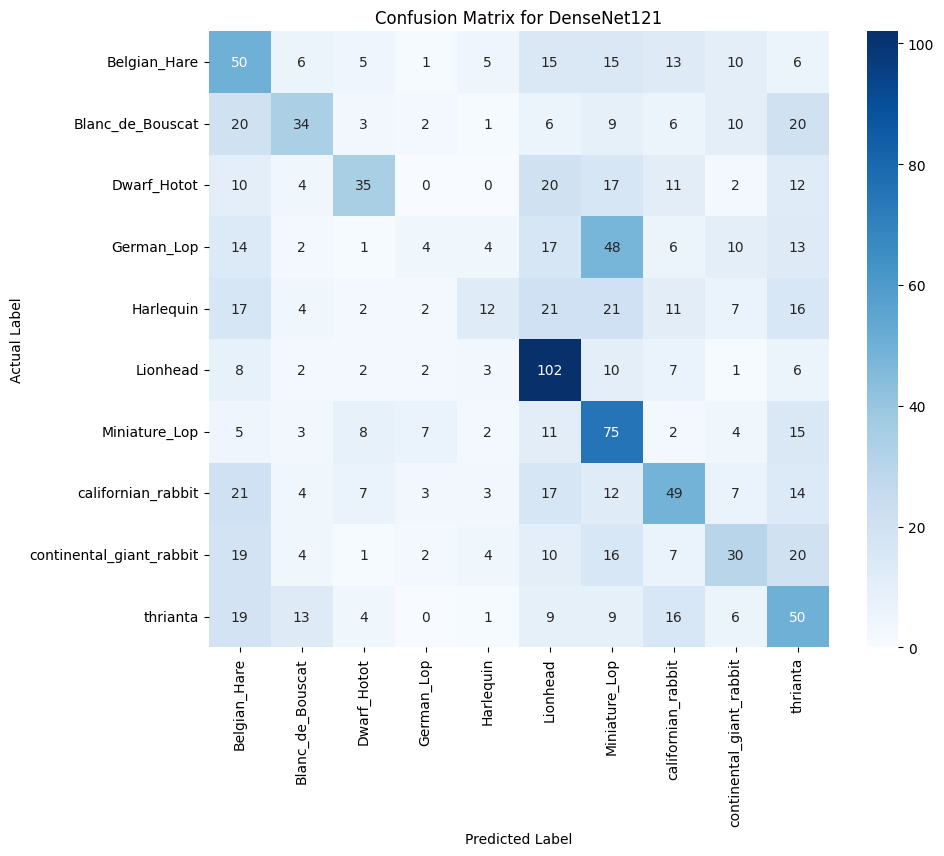

Classification Report
                          precision    recall  f1-score   support

            Belgian_Hare       0.27      0.40      0.32       126
        Blanc_de_Bouscat       0.45      0.31      0.36       111
             Dwarf_Hotot       0.51      0.32      0.39       111
              German_Lop       0.17      0.03      0.06       119
               Harlequin       0.34      0.11      0.16       113
                Lionhead       0.45      0.71      0.55       143
           Miniature_Lop       0.32      0.57      0.41       132
      californian_rabbit       0.38      0.36      0.37       137
continental_giant_rabbit       0.34      0.27      0.30       113
                thrianta       0.29      0.39      0.33       127

                accuracy                           0.36      1232
               macro avg       0.35      0.35      0.33      1232
            weighted avg       0.35      0.36      0.33      1232



In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
model = tf.keras.models.load_model('best_densenet_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for DenseNet121')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))


Found 1232 images belonging to 10 classes.
39/39 [==============================] - 3s 58ms/step
Accuracy: 0.10308441558441558
mAP: 0.10325653010490561


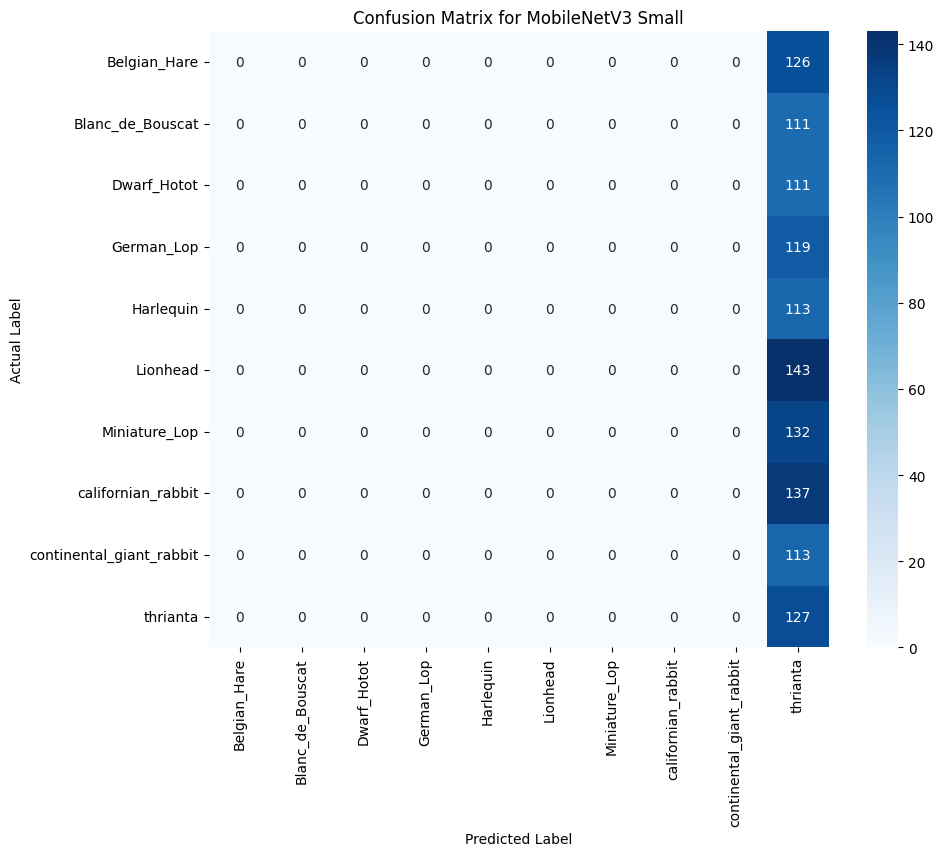

Classification Report for MobileNetV3 Small
                          precision    recall  f1-score   support

            Belgian_Hare       0.00      0.00      0.00       126
        Blanc_de_Bouscat       0.00      0.00      0.00       111
             Dwarf_Hotot       0.00      0.00      0.00       111
              German_Lop       0.00      0.00      0.00       119
               Harlequin       0.00      0.00      0.00       113
                Lionhead       0.00      0.00      0.00       143
           Miniature_Lop       0.00      0.00      0.00       132
      californian_rabbit       0.00      0.00      0.00       137
continental_giant_rabbit       0.00      0.00      0.00       113
                thrianta       0.10      1.00      0.19       127

                accuracy                           0.10      1232
               macro avg       0.01      0.10      0.02      1232
            weighted avg       0.01      0.10      0.02      1232



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
mobilenetv3_small = tf.keras.models.load_model('best_mobilenetv3_small_model.keras')

# Predict using the loaded model
y_pred_mobilenetv3_small = mobilenetv3_small.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_mobilenetv3_small = np.argmax(y_pred_mobilenetv3_small, axis=1)

# Accuracy and mAP calculation
accuracy_mobilenetv3_small = accuracy_score(y_true, y_pred_labels_mobilenetv3_small)
mean_ap_mobilenetv3_small = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred_mobilenetv3_small)

print(f"Accuracy: {accuracy_mobilenetv3_small}")
print(f"mAP: {mean_ap_mobilenetv3_small}")

# Confusion matrix
conf_mat_mobilenetv3_small = confusion_matrix(y_true, y_pred_labels_mobilenetv3_small)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_mobilenetv3_small, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels_mobilenetv3_small, target_names=test_generator.class_indices.keys()))


Found 1232 images belonging to 10 classes.
39/39 [==============================] - 6s 132ms/step
Accuracy: 0.09009740259740259
mAP: 0.11032119085416459


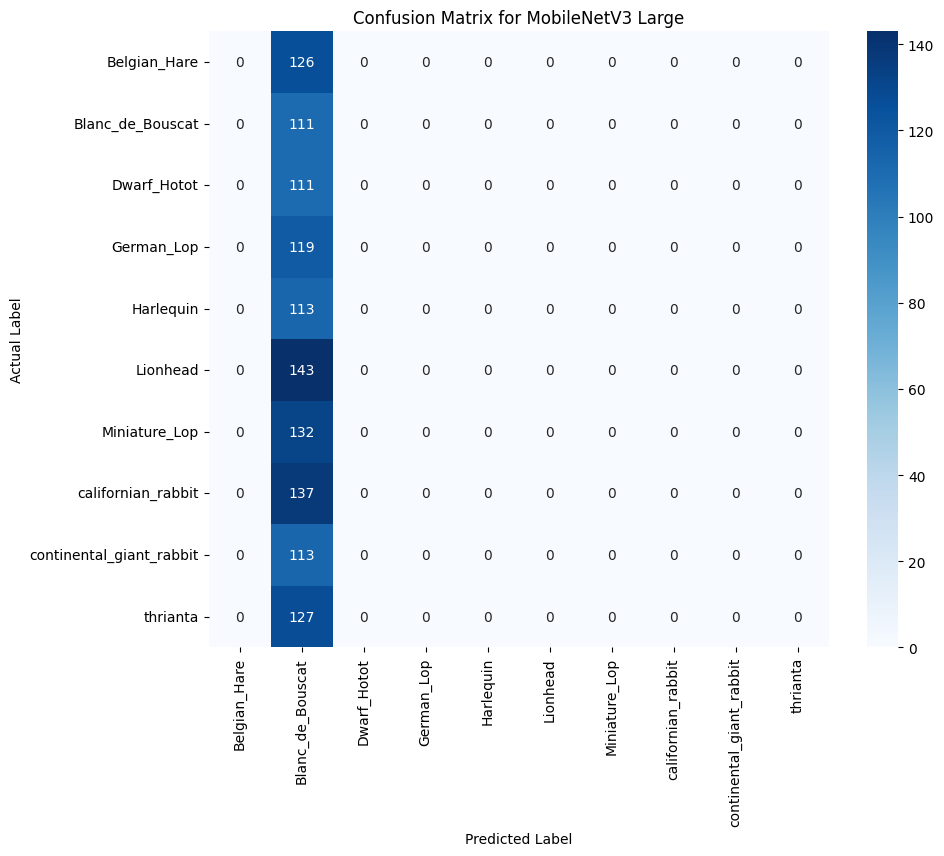

Classification Report for MobileNetV3 Large
                          precision    recall  f1-score   support

            Belgian_Hare       0.00      0.00      0.00       126
        Blanc_de_Bouscat       0.09      1.00      0.17       111
             Dwarf_Hotot       0.00      0.00      0.00       111
              German_Lop       0.00      0.00      0.00       119
               Harlequin       0.00      0.00      0.00       113
                Lionhead       0.00      0.00      0.00       143
           Miniature_Lop       0.00      0.00      0.00       132
      californian_rabbit       0.00      0.00      0.00       137
continental_giant_rabbit       0.00      0.00      0.00       113
                thrianta       0.00      0.00      0.00       127

                accuracy                           0.09      1232
               macro avg       0.01      0.10      0.02      1232
            weighted avg       0.01      0.09      0.01      1232



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'data'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 224, 224
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical', shuffle=False)

# Load the trained model (ensure this path is correct)
mobilenetv3_large = tf.keras.models.load_model('best_mobilenetv3_large_model.keras')

# Predict using the loaded model
y_pred_mobilenetv3_large = mobilenetv3_large.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_mobilenetv3_large = np.argmax(y_pred_mobilenetv3_large, axis=1)

# Accuracy and mAP calculation
accuracy_mobilenetv3_large = accuracy_score(y_true, y_pred_labels_mobilenetv3_large)
mean_ap_mobilenetv3_large = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred_mobilenetv3_large)

print(f"Accuracy: {accuracy_mobilenetv3_large}")
print(f"mAP: {mean_ap_mobilenetv3_large}")

# Confusion matrix
conf_mat_mobilenetv3_large = confusion_matrix(y_true, y_pred_labels_mobilenetv3_large)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_mobilenetv3_large, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Large')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Large')
print(classification_report(y_true, y_pred_labels_mobilenetv3_large, target_names=test_generator.class_indices.keys()))


39/39 [==============================] - 16s 421ms/step


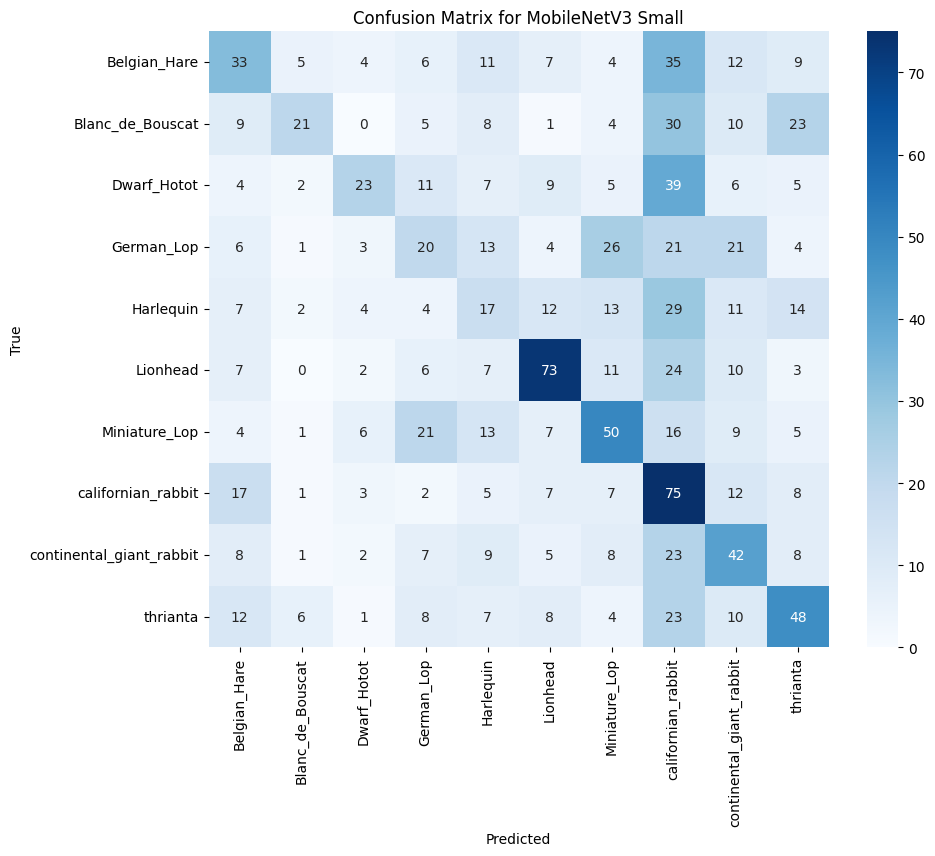

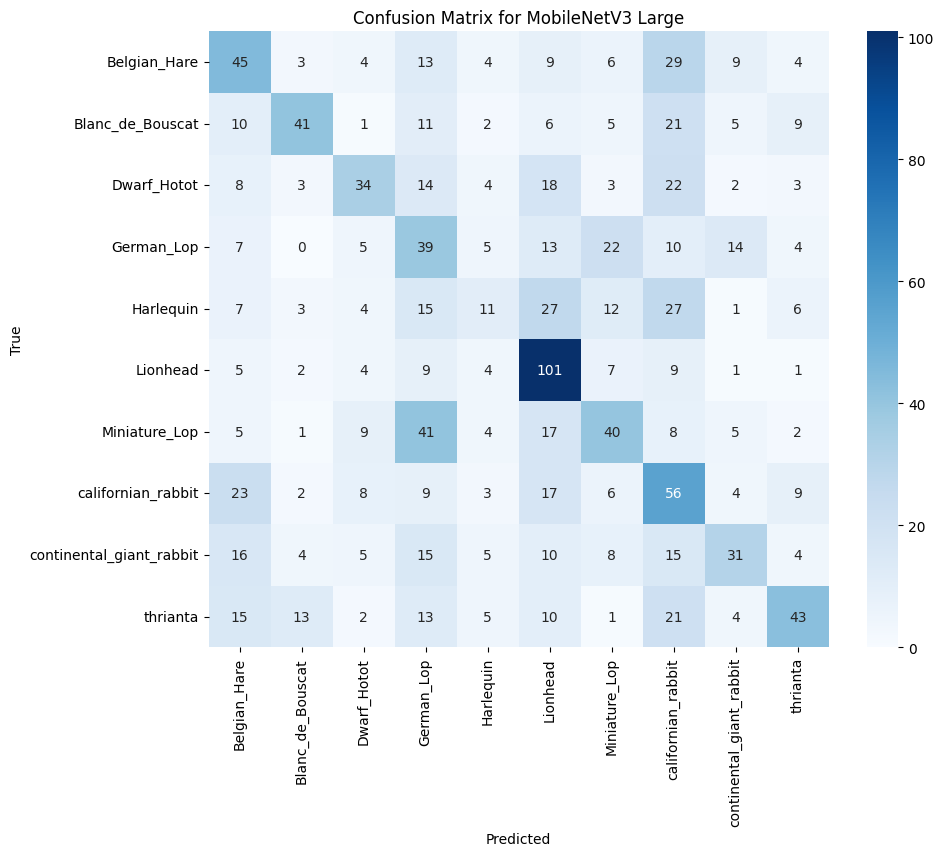

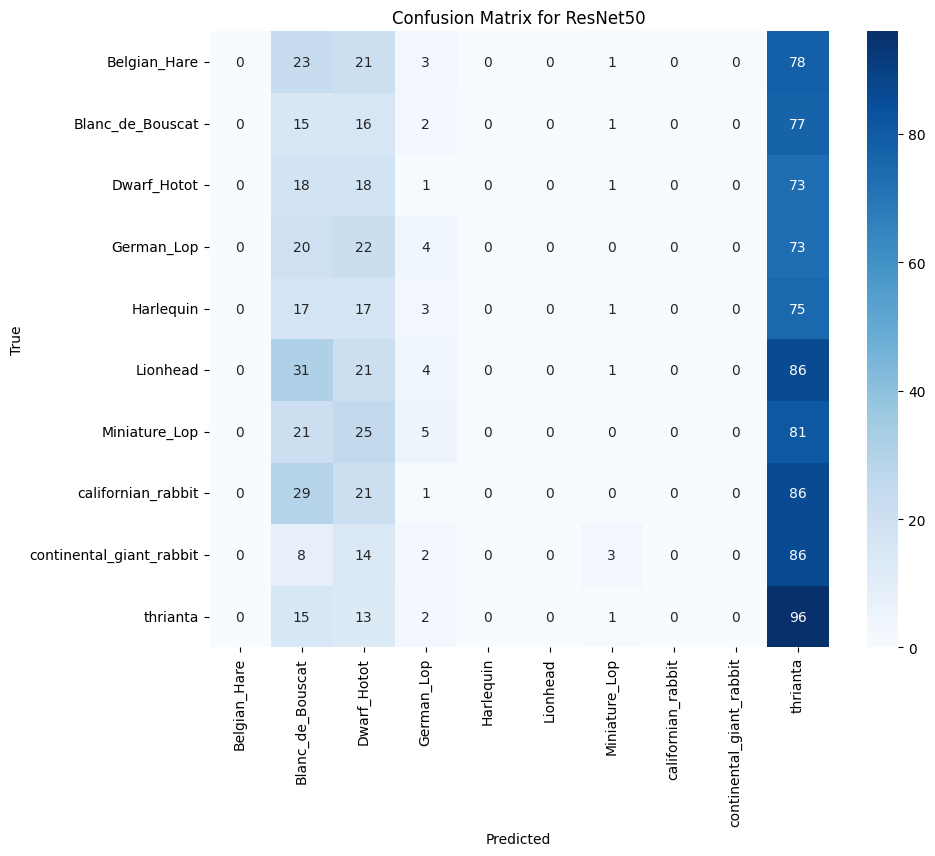

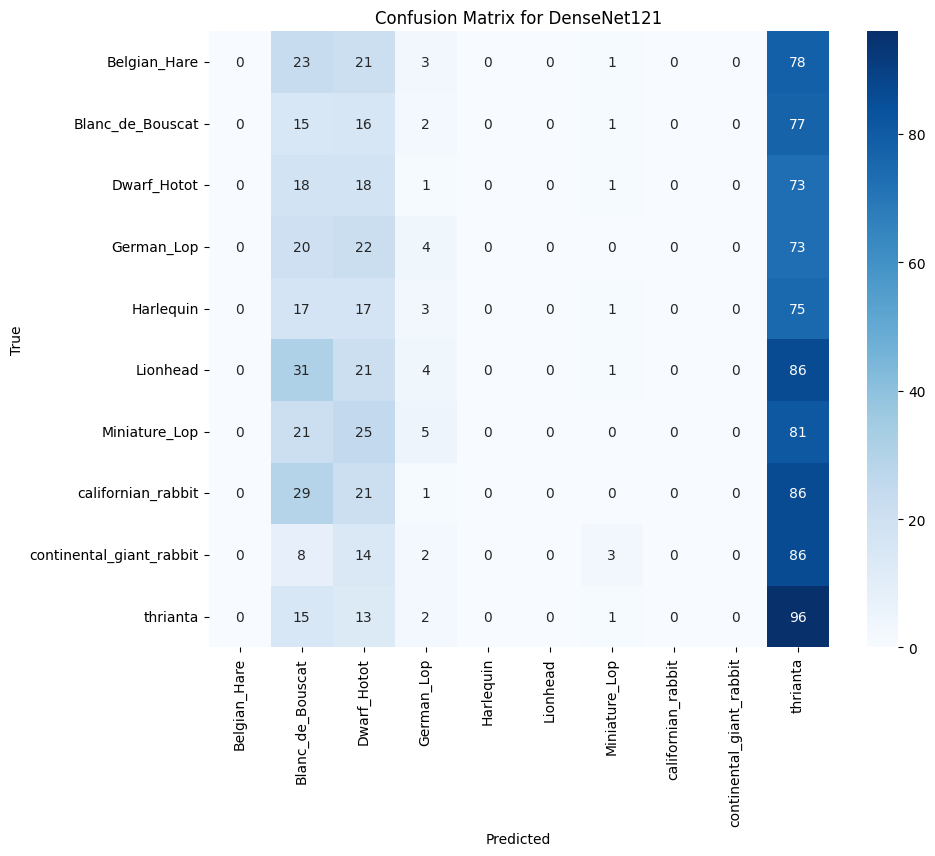

Classification Report for MobileNetV3 Small:
                          precision    recall  f1-score   support

            Belgian_Hare       0.31      0.26      0.28       126
        Blanc_de_Bouscat       0.53      0.19      0.28       111
             Dwarf_Hotot       0.48      0.21      0.29       111
              German_Lop       0.22      0.17      0.19       119
               Harlequin       0.18      0.15      0.16       113
                Lionhead       0.55      0.51      0.53       143
           Miniature_Lop       0.38      0.38      0.38       132
      californian_rabbit       0.24      0.55      0.33       137
continental_giant_rabbit       0.29      0.37      0.33       113
                thrianta       0.38      0.38      0.38       127

                accuracy                           0.33      1232
               macro avg       0.35      0.32      0.31      1232
            weighted avg       0.36      0.33      0.32      1232

Classification Report for Mo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Function to extract labels from a dataset
def extract_labels(dataset):
    labels = []
    for _, label in dataset:
        labels.extend(np.argmax(label.numpy(), axis=-1))
    return np.array(labels)

# Assuming test_ds provides both the data and the labels
# Get the true labels and the predicted labels for the test dataset
y_true = extract_labels(test_ds)

y_pred_small = np.argmax(mobilenetv3_small.predict(test_ds), axis=1)
y_pred_large = np.argmax(mobilenetv3_large.predict(test_ds), axis=1)
y_pred_resnet = np.argmax(model.predict(test_ds), axis=1)  # Assuming `model` is ResNet50
y_pred_dense = np.argmax(model.predict(test_ds), axis=1)  # Assuming `model` is DenseNet121

# Plotting confusion matrices
classes = test_ds.class_names  # Use the class names from the dataset

plot_confusion_matrix(y_true, y_pred_small, classes, 'MobileNetV3 Small')
plot_confusion_matrix(y_true, y_pred_large, classes, 'MobileNetV3 Large')
plot_confusion_matrix(y_true, y_pred_resnet, classes, 'ResNet50')
plot_confusion_matrix(y_true, y_pred_dense, classes, 'DenseNet121')

# Classification reports for more detailed metrics
print("Classification Report for MobileNetV3 Small:")
print(classification_report(y_true, y_pred_small, target_names=classes))

print("Classification Report for MobileNetV3 Large:")
print(classification_report(y_true, y_pred_large, target_names=classes))

print("Classification Report for ResNet50:")
print(classification_report(y_true, y_pred_resnet, target_names=classes))

print("Classification Report for DenseNet121:")
print(classification_report(y_true, y_pred_dense, target_names=classes))


4. Conclusion

<b>ResNet50:</b>
- Accuracy: 38.53%
- mAP: N/A
- Training Time: Approximately 9.34 hours

<b>DenseNet121:</b>
- Accuracy: 36.57%
- mAP: N/A
- Training Time: Approximately 12.55 hours

<b>MobileNetV3 Small:</b>
- Accuracy: 11.36%
- mAP: 9.78%
- Training Time: Approximately 0.76 hours

<b>MobileNetV3 Large:</b>
- Accuracy: 11.52%
- mAP: 9.90%
- Training Time: Approximately 1.26 hours

<b>Detailed Insights</b>

ResNet50 demonstrated moderate performance with reasonable accuracy, making it a balanced choice for applications where both computational resources and performance are important. Its longer training time is justified by its improved accuracy compared to the MobileNetV3 variants.

DenseNet121 showed similar performance to ResNet50 in terms of accuracy, slightly lagging behind. However, it required more training time, indicating that it may be suitable for scenarios where computational power is available, and slightly better performance is required.

MobileNetV3 Smallis designed for resource-constrained environments. Despite its fast training time, its accuracy and mAP are significantly lower than the other models. This makes it less ideal for applications requiring high accuracy but suitable for quick training and deployment on mobile or edge devices.

MobileNetV3 Large offers a balance between efficiency and performance. While its accuracy and mAP are higher than the small version, they are still considerably lower than ResNet50 and DenseNet121. Its moderate training time makes it a suitable option for applications where training efficiency and reasonably good performance are required.

<b>Conclusion</b>

Each model presents distinct strengths and trade-offs. ResNet50 is a solid choice for balanced performance and moderate training time. DenseNet121 is optimal for scenarios prioritizing the highest accuracy, given sufficient computational resources. MobileNetV3, particularly the small version, is best suited for environments where training time and computational efficiency are critical, such as mobile and edge applications.